KMeans is parametric algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data preparition

In [2]:
mean1, cov1 = [1,0], [[1.5,2],[1,2]]
mean2, cov2 = [4,6], [[2.5,-1.5],[-1.5,2]]
mean3, cov3 = [9,8], [[2,1.5],[-1,0.5]]

In [4]:
data1 = np.random.multivariate_normal(mean1,cov1,200)
data2 = np.random.multivariate_normal(mean2,cov3,200)
data3 = np.random.multivariate_normal(mean3,cov3,200)

X = np.vstack([data1, data2, data3]) #vertically stacking the data

C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
X.shape

(600, 2)

In [6]:
np.random.shuffle(X)

algo creating SCRATCH

In [18]:
def kMeans(X, k=3, max_iters = 15):
    m = X.shape[0]
    row_index = np.random.choice(np.arange(m),k)  # select 3 data point randomly from dataset
    centroids = X[row_index, :]
    
    for iter in range(max_iters):
        C=[]
        for x in X:
            distance =[]
            for c in centroids:
                d = np.dot(x-c,x-c) #L2 distance
                distance.append(d)
            ci = np.argmin(distance) # taking minimum distance (index)
            C.append(ci) #every point 
        C = np.asarray(C)
        
        for i in range(k):
            centroids[i] = X[C==i].mean(axis=0)# updating the centroid 
    
    return centroids,C

In [19]:
centroids,C = kMeans(X)
centroids

array([[ 1.02590903, -0.01601281],
       [ 3.94576145,  5.93937759],
       [ 8.96989212,  8.03850595]])

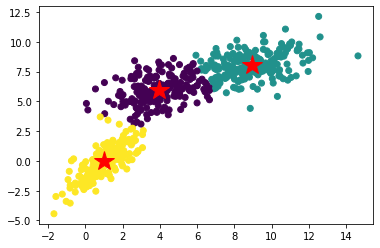

In [17]:
plt.scatter(X[:,0],X[:,1],c=C)
plt.plot(centroids[:,0],centroids[:,1],'r*',markersize=20)

plt.show()